In [2]:
import numpy as np
from scipy import stats

In [12]:
a, b = np.round(stats.norm.interval(0.9, loc=2, scale=0.3), 2)

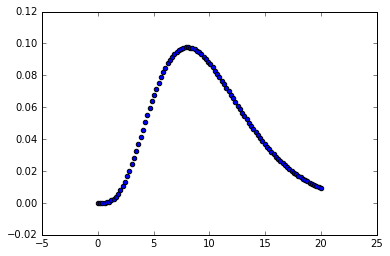

In [24]:
chi = stats.chi2(df=10)
x = np.linspace(0, 20, 100)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, stats.chi2.pdf(x, df=10))

In [31]:
round(stats.chi2.cdf(9, df=10), 2)

0.46999999999999997

In [106]:
import pandas as pd
df = pd.read_csv('diamonds.csv', index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [107]:
print('Mean price = ', round(df.price.mean()))
print('Number of premiums = ', len(df[df.cut == 'Premium'].index))
df['cut'].value_counts()

Mean price =  3933
Number of premiums =  13791


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [108]:
from pandas.stats.api import ols
res = ols(y=df.price, x=df[['carat', 'x', 'y']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <carat> + <x> + <y> + <intercept>

Number of Observations:         53940
Number of Degrees of Freedom:   4

R-squared:         0.8535
Adj R-squared:     0.8535

Rmse:           1527.0318

F-stat (3, 53936): 104739.6241, p-value:     0.0000

Degrees of Freedom: model 3, resid 53936

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         carat 10117.9863    62.5623     161.73     0.0000  9995.3642 10240.6084
             x -1148.6055    36.3066     -31.64     0.0000 -1219.7665 -1077.4446
             y   126.0026    25.7650       4.89     0.0000    75.5033   176.5019
     intercept  1719.5301   103.6694      16.59     0.0000  1516.3381  1922.7220
---------------------------------End of Summary-------

In [109]:
10117.9863 / 62.5623

161.72657175327635

In [110]:
stats.t.ppf(0.95, df=27)
l = 5 - stats.t.ppf(0.95, df=27) * 1
l

3.2967115542778735

In [111]:
stats.norm.cdf(9, loc=7, scale=4)

0.69146246127401312

In [112]:
df.price.max()

18823

In [113]:
res = ols(y=df.price, x=df[['carat', 'x', 'y', 'table']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <carat> + <x> + <y> + <table> + <intercept>

Number of Observations:         53940
Number of Degrees of Freedom:   5

R-squared:         0.8548
Adj R-squared:     0.8547

Rmse:           1520.4750

F-stat (4, 53935): 79350.4783, p-value:     0.0000

Degrees of Freedom: model 4, resid 53935

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         carat 10064.1142    62.3435     161.43     0.0000  9941.9209 10186.3075
             x -1085.1368    36.2698     -29.92     0.0000 -1156.2256 -1014.0481
             y   109.7652    25.6653       4.28     0.0000    59.4611   160.0692
         table   -64.6527     2.9912     -21.61     0.0000   -70.5155   -58.7900
     intercept  5206.6451   191.5298      27.

In [114]:
p = 109.7652 / 25.6653
p
deg_f = 53935
stats.t.pdf(p, df=deg_f)

4.2626024537202282e-05

In [116]:
res = ols(y=df.price, x=df[['carat', 'x', 'y']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <carat> + <x> + <y> + <intercept>

Number of Observations:         53940
Number of Degrees of Freedom:   4

R-squared:         0.8535
Adj R-squared:     0.8535

Rmse:           1527.0318

F-stat (3, 53936): 104739.6241, p-value:     0.0000

Degrees of Freedom: model 3, resid 53936

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
         carat 10117.9863    62.5623     161.73     0.0000  9995.3642 10240.6084
             x -1148.6055    36.3066     -31.64     0.0000 -1219.7665 -1077.4446
             y   126.0026    25.7650       4.89     0.0000    75.5033   176.5019
     intercept  1719.5301   103.6694      16.59     0.0000  1516.3381  1922.7220
---------------------------------End of Summary-------

In [134]:
t = res.beta.carat / res.std_err.carat
a = 0.9
t_cr = stats.t.ppf(0.95, df=res.df_resid)
t, t_cr
t_cr_round = round(t_cr, 3)
left_conf_int, right_conf_int = round(res.beta.carat - t_cr_round * res.std_err.carat, 2), \
            round(res.beta.carat + t_cr_round * res.std_err.carat, 2)
left_conf_int, right_conf_int

(10015.07, 10220.9)